<a href="https://colab.research.google.com/github/hooroobaby/DSonCyberSecurity/blob/main/111356043_H_ZeroAccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ZeroAccess

An interesting data set
* Where ZeroAccess occurs? Any patterns?
* What kind of users are easily to be infected? Does education or income affect infection rate?
* Does UFO cause ZeroAccess infection?



### Quesion #0:

Your name, student ID, department. If you skip this question, no points will be given. Also, you cannot share your file to any other one. If you have any question, post a message in the class forum (https://groups.google.com/g/nccu-ds4s).


Answer #0:

Your name:  **林驊萱**

student ID:  **111356043**

department: **MIS**

In [ ]:
# We will use some python libraries,
# import them at the begin of the code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# We read three data tables from external resources.
# They are stored in a data structure named 'dataframe'.
# Bascally, a dataframe is a table.

z_df = pd.read_csv("https://drive.google.com/uc?id=13iE3A-OO_oWZrEvDmpN_nA6yPfLpCiZv") # zeroaccess.csv
s_df = pd.read_csv("https://drive.google.com/uc?id=13nE04n2MwRAMFSPxS96dYMe1RYgZujxS") # state-internets.csv
c_df = pd.read_csv("https://drive.google.com/uc?id=13qH1zWX4FQGNo43m_7ufSsDUbYUxa81O") # county-data.csv

In [ ]:
# The shap of a table is (how many rows, how many columns).

print(z_df.shape, s_df.shape, c_df.shape)

(808446, 2) (49, 3) (3072, 6)


In [ ]:
# We list the first five rows of z dataframe.
# This is the latitude and longitude of where a cyber attack observed.
# In total, there are 808446 reported ZeroAccess attacks.

z_df.head()

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484


In [ ]:
# s dataframe contains some data related to the states in the US.

s_df.head()

,state,population,internet
0,Alabama,4758191,3092273
1,Arizona,6665093,5230474
2,Arkansas,2919815,1949869
3,California,37350092,29758896
4,Colorado,5077553,4058749


In [ ]:
# c dataframe is another dataset related to US states.
# pop: state population; ufo2010: # of ufo sightings
c_df.head()

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0


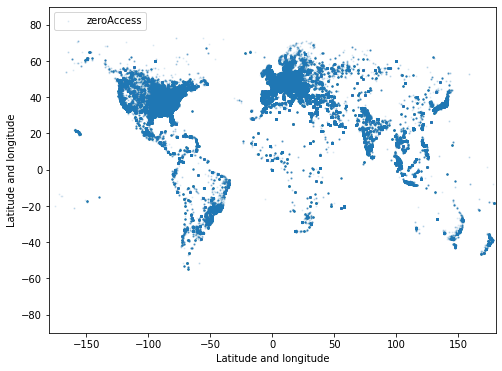

In [ ]:
# plot zeroAccess infection instances on a earth map
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(z_df.long, z_df.lat, alpha = 0.1, s = 1, label = "zeroAccess")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

In [ ]:
# Use another tool, much more pretty
# https://python-visualization.github.io/folium/quickstart.html

import folium
from folium.plugins import HeatMap
mapa = folium.Map(location=(10, 10), zoom_start=1.5, tiles="Stamen Toner", height="50%", width="50%")
loc_li = list(zip(list(z_df.lat), (z_df.long)))[:10000] # <-- change data size
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa

### Reverse Geocoding



Now, we are trying to know which state does the ZeroAccess incident observed. So we need a tool to help us to map the latitude and longitude in z_df to a US state.

In [ ]:
!pip install reverse_geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# I implement some nice functions for you.

import reverse_geocoder

# {'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater',
#  'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}

# quick implementation
def rgr(s):
  cord_li = [(s[0], s[1])]
  result_dict_li = reverse_geocoder.search(cord_li)
  ret_ser = pd.Series(dict(result_dict_li[0]))
  return ret_ser.drop(labels=['lat', 'lon'])

# batch implementation
def rgr_batch(lat_long_df):
  cord_li = []
  for ind in lat_long_df.index:
    cord_li.append((lat_long_df['lat'][ind], lat_long_df['long'][ind]))
  result_dict_li = reverse_geocoder.search(cord_li)
  return pd.DataFrame(result_dict_li).drop(["lat", "lon"], axis = 1)

In [ ]:
# quick implementation
'''
sample_df = z_df.head(50) # <------ only use some data, because it takes time
country_df = sample_df.apply(lambda s: rgr(s), axis = 1)
df = sample_df.join(country_df)
df
'''

'\nsample_df = z_df.head(50) # <------ only use some data, because it takes time\ncountry_df = sample_df.apply(lambda s: rgr(s), axis = 1)\ndf = sample_df.join(country_df)\ndf\n'

In [ ]:
# batch implementation
# Now you have a new dataframe, df, which contains the state information.
sample_df = z_df.head(50000) # <------ only use some data, because it takes time
country_df = rgr_batch(sample_df)
df = sample_df.join(country_df).rename(columns={'name':'City', 'admin1': 'State', 'admin2':'County', 'cc':"country_code", })
df.head()

,lat,long,City,State,County,country_code
0,-10.0000,-55.0000,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
3,48.6210,7.4944,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US


### Question #1:
Extract some information from df. First, how many ZeroAccess attacks are observed in each country? Show us the statistics in a dataframe and print it. If you are not famaliar with dataframe operation, please review the lecture material. (USA has 23,987 incidients.)

In [ ]:
# df.groupby(["County"]).County.count()
countyGroup = df.groupby(['country_code'])['County'].count()
# countyGroup.groups.keys() # all country name
print(countyGroup['US']) #確認US有23,987個

23987


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

countyGroup.sort_values(ascending=False).to_frame()
countyGroup[:10]

country_code
AE     165
AF       9
AI       1
AL      19
AM      20
AO      13
AR     165
AS       1
AT     116
AU    1501
Name: County, dtype: int64

### Question #2:

Plot a figure to show % of attack in each country
Ignore countries that are < 1%. Again, you need to manipulate the df dataframe to get the answer. Try matplotlib's bar function to draw the follwing figure, or use any other library.

In [ ]:
attackPerc = df.groupby(['country_code']).country_code.apply(lambda x: x.count()/df.country_code.count())
attackPerc = attackPerc.loc[attackPerc>=0.01].sort_values(ascending=False)
attackPerc.index.name = None
attackPerc.to_frame()

,country_code
US,0.47974
CA,0.05932
GB,0.05128
JP,0.03008
AU,0.03002
IT,0.02964
DE,0.02824
FR,0.02622
BR,0.01928
IN,0.01496


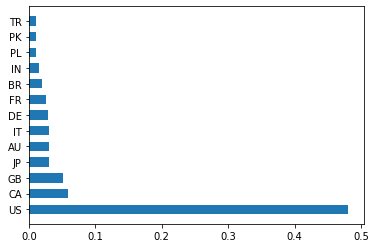

In [ ]:
# Print the ratio here as shown below.
import matplotlib.pyplot as plt
x = list(attackPerc.index)
y = list(attackPerc)
plt.barh(x, y, height = 0.6)
plt.show()

### Question #3:

Only show US data and map.
Show US state data.

Which state/city has severe ZeroAccess attack? Why? (open question)

In [ ]:
us_df = df[df.country_code == 'US']
us_df.head()

,lat,long,City,State,County,country_code
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
6,44.8012,-68.7778,Bangor,Maine,Penobscot County,US
8,36.0580,-88.8253,Bradford,Tennessee,Gibson County,US


###analysis-1
從地圖來看的話，是東岸比較嚴重。東西岸共通點是靠岸邊會比較嚴重

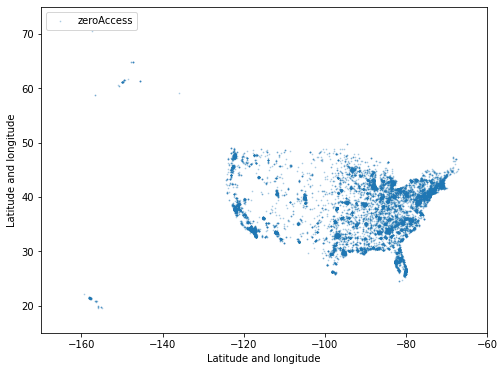

In [ ]:
# Try to write codes to show the following map.
# 繪製圖表外框
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

x = list(us_df['long'])
y = list(us_df['lat'])
ax.scatter(x, y, alpha = 0.3, s = 0.5, label = "zeroAccess")

ax.set_xlim((-170, -60))
ax.set_ylim((15, 75))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

In [ ]:
mapa = folium.Map(location=(45, -110), zoom_start=2.5, tiles="Stamen Toner", height="80%", width="80%")
loc_li = list(zip(y, x)) # <-- change data size
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa

###analysis-2
Califonia, Texas比較嚴重，Florida, Kansas, NY介於1000-2000之間

而在這些State中，在US百分比>=0.1%的city又有下面那些

又以Kansas的Peabody最多，為0.048026，總數目有1152個

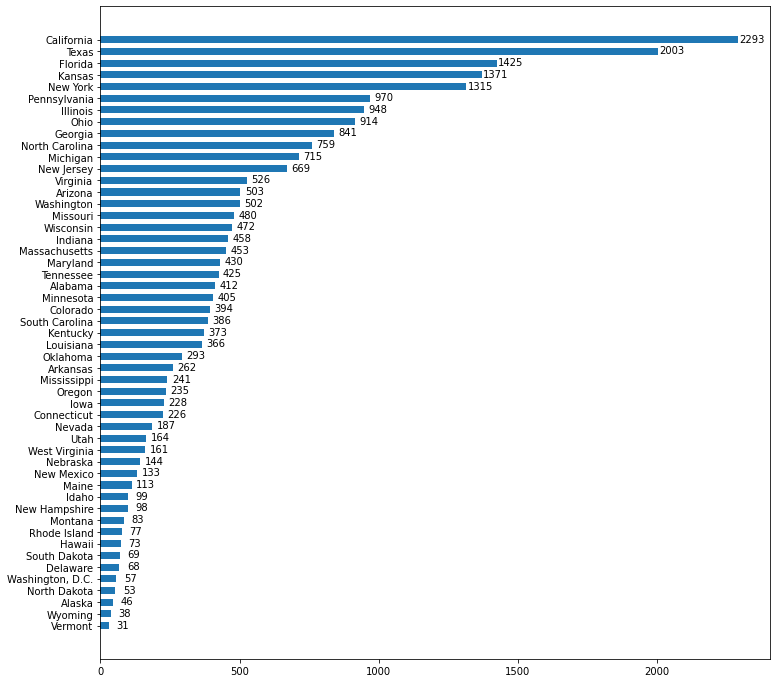

In [ ]:
# Show data.
fig = plt.figure(figsize=(12,12))

stateUs = us_df.groupby("State").State.count().sort_values(ascending=True)
stateUs
plt.barh(stateUs.index, list(stateUs), height = 0.6)
for i, v in enumerate(list(stateUs)):
    plt.text(v+50, i-0.2, str(v), ha='center')
plt.show()

In [ ]:
# City data.
cityUs = us_df.groupby(["State", "City"]).long.count().sort_values(ascending=False)

In [ ]:
severeCity = us_df[us_df.State.isin(["California", "Texas", "Florida", "Kansas", "NY"])].groupby(['State', 'City']).City.apply(lambda x: x.count() / us_df.City.count())
severe = severeCity.loc[severeCity>=0.001]
cityArr = []
severeCityCount = us_df[us_df.State.isin(["California", "Texas", "Florida", "Kansas", "NY"])].groupby(['City']).City.apply(lambda x: x.count())
severeCityCount = severeCityCount.to_frame()
for city in enumerate(severe.index):
  city = city[1][1]
  cityArr.append(severeCityCount[severeCityCount["City"].index==city].City[city])
severe = severe.to_frame()
severe["num"] = cityArr
# cityArr
severe

City   num
State      City                           
California Los Angeles      0.007462   179
           Modesto          0.001042    25
           Oakland          0.001126    29
           Sacramento       0.001793    43
           San Diego        0.001668    40
           San Francisco    0.001626    39
           San Jose         0.001084    26
Florida    Fort Lauderdale  0.002793    67
           Jacksonville     0.001543    41
           Miami            0.002418    58
           Orlando          0.001709    41
           Tampa            0.001459    35
           Winter Haven     0.001001    24
Kansas     Peabody          0.048026  1152
           Wichita          0.002084    50
Texas      Arlington        0.001084    26
           Austin           0.001459    35
           Dallas           0.004836   116
           El Paso          0.001334    32
           Fort Worth       0.001543    37
           Houston          0.009922   238
           San Antonio      0.005753   138

### Question #4:

Is there anything wrong with these states?

### Ans #4:

數量沒問題，用正規表達式發現state名稱格式不一，可能會用標點符號或是空格區隔，這樣在不同資料表處理時，可能會發生問題

（例如：Q5的s_df跟df中的華盛頓特區的名稱不同，在處理時就會有問題）

In [ ]:
Q4 = df.groupby("State").State.count().sort_values(ascending=False)
Q4.index.name = None
Q4.name = 'attack'
Q4 = Q4.to_frame()
Q4['att_pc'] = Q4['attack']/Q4['attack'].sum()
Q4.head()

,attack,att_pc
England,2297,0.04594
California,2293,0.04586
Texas,2003,0.04006
Florida,1425,0.02850
Kansas,1371,0.02742


In [ ]:
len(df.groupby("State").State.count().index)

1178

In [ ]:
len(Q4)

1178

In [ ]:
import re
for q4 in Q4.index:
  # print(re.search(r'[^\w\s]', q4))
  if(re.search(r'[^\w\s]', q4)):
    print(q4)

North Rhine-Westphalia
Ile-de-France
Baden-Wuerttemberg
Rhone-Alpes
Kujawsko-Pomorskie
Provence-Alpes-Cote d'Azur
Emilia-Romagna
Midi-Pyrenees
Rheinland-Pfalz
Washington, D.C.
Nord-Pas-de-Calais
Castille-La Mancha
Languedoc-Roussillon
Bogota D.C.
Schleswig-Holstein
Chungcheongbuk-do
Saxony-Anhalt
Poitou-Charentes
Haute-Normandie
Meknes-Tafilalet
Champagne-Ardenne
Franche-Comte
Trentino-Alto Adige
Rabat-Sale-Zemmour-Zaer
Mecklenburg-Vorpommern
Warmian-Masurian Voivodeship
Muhafazat al Jahra'
KwaZulu-Natal
St.-Petersburg
Bangka-Belitung Islands
Sofia-Capital
Manawatu-Wanganui
T'bilisi
Brodsko-Posavska
Varsinais-Suomi
Khanty-Mansiyskiy Avtonomnyy Okrug
Jasz-Nagykun-Szolnok
Sisacko-Moslavacka
Stavropol'skiy
Hawke's Bay
Osjecko-Baranjska
Southern Nations, Nationalities, and People's Region
Sor-Trondelag
Brong-Ahafo
Borsod-Abauj-Zemplen
Gyeonggi-do
Primorsko-Goranska
Vest-Agder
Splitsko-Dalmatinska
Tanger-Tetouan
Tas-Sliema
Ba Ria-Vung Tau
Hajdu-Bihar
Basel-City
Aust-Agder
Tunapuna/Piarco
Sa

In [ ]:
Q4["attack"].sum()

50000

### Question #5:

Are the attack occurances in each state related to state population?

Try a bar chart!

In [ ]:
s_df.head()

,state,population,internet
0,Alabama,4758191,3092273
1,Arizona,6665093,5230474
2,Arkansas,2919815,1949869
3,California,37350092,29758896
4,Colorado,5077553,4058749


In [ ]:
s_df = s_df.set_index('state')
s_df = s_df.rename(index={'District of Columbia':'Washington, D.C.'})
print(s_df.index)

Index(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Washington, D.C.', 'Florida', 'Georgia',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')


In [ ]:
# print(df.groupby(['State']).State.count()["District of Columbia"])
attNo = []
for state in s_df.index:
  # print(df.groupby(['State']).State.count()[state])
  attNo.append(df.groupby(['State']).State.count()[state])
s_df["attNo"] = attNo
s_df["attPopPerc"] = s_df["attNo"]/s_df["population"]
s_df["attPerc"] = s_df["attNo"]/s_df["attNo"].sum()
s_df["popPerc"] = s_df["population"]/s_df["population"].sum()
s_df.head()

,population,internet,attNo,attPopPerc,attPerc,popPerc
state,,,,,,
Alabama,4758191,3092273,412,0.000087,0.017261,0.015438
Arizona,6665093,5230474,503,0.000075,0.021073,0.021625
Arkansas,2919815,1949869,262,0.000090,0.010977,0.009473
California,37350092,29758896,2293,0.000061,0.096066,0.121181
Colorado,5077553,4058749,394,0.000078,0.016507,0.016474


### Ans5
除了在Q3中有提過的attack數量較高的Kansas，attack/attack總數 大於 population比率很多外，其他都幾乎是差不多

<AxesSubplot:xlabel='state'>

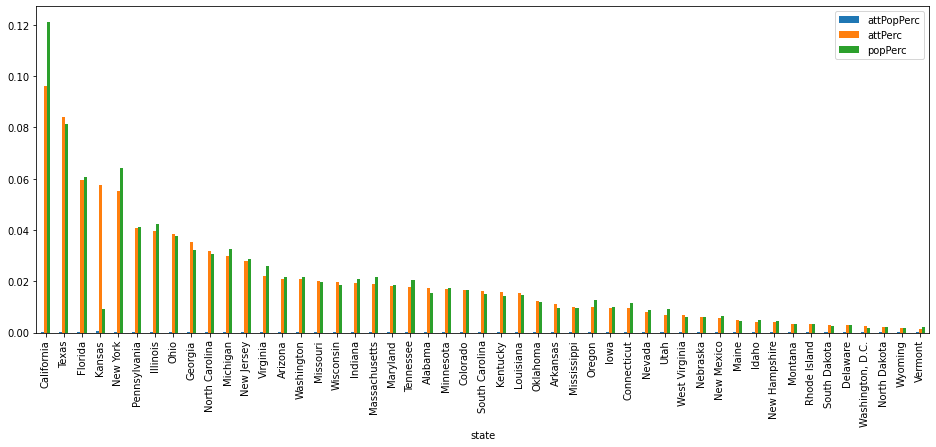

In [ ]:
s_df.sort_values(by='attPerc',ascending=False).plot(y=["attPopPerc", "attPerc", "popPerc"], kind="bar", figsize=(16,6))

### UFO?

Try to use county-data.csv data to predict the attack counts for each state by liner regression. (You may copy the code in the lecture and use a simple library to calculate the result.)

Which feature is the most 'sensetive' to UFO sightings?

In [ ]:
print(c_df.head())
print(s_df.head())

   subregion          region     pop  income   ipaddr  ufo2010
0  abbeville  south carolina   25101   34670    30330        2
1     acadia       louisiana   61912   37970    38203        6
2   accomack        virginia   33341   41595    41338        2
3        ada           idaho  409061   55304  1035427       59
4      adair            iowa    7481   47623     3762        0
            population  internet  attNo  attPopPerc   attPerc   popPerc
state                                                                  
Alabama        4758191   3092273    412    0.000087  0.017261  0.015438
Arizona        6665093   5230474    503    0.000075  0.021073  0.021625
Arkansas       2919815   1949869    262    0.000090  0.010977  0.009473
California    37350092  29758896   2293    0.000061  0.096066  0.121181
Colorado       5077553   4058749    394    0.000078  0.016507  0.016474


In [ ]:
s_df = s_df.rename(index = {'Washington, D.C.':'District of Columbia'}).sort_index()
s_df.index = s_df.index.str.lower()
UFO_df = c_df.groupby('region').sum()
# print(UFO_df)
UFO_df = pd.concat([UFO_df, s_df["attNo"], s_df["attPerc"], s_df["popPerc"]], axis=1, join="inner")
UFO_df.head()

,pop,income,ipaddr,ufo2010,attNo,attPerc,popPerc
alabama,4822023,2522962,22542601,250,412,0.017261,0.015438
arizona,6532974,612727,62062174,1250,503,0.021073,0.021625
arkansas,2949131,2677866,4810526,265,262,0.010977,0.009473
california,38041430,3241756,156511903,3769,2293,0.096066,0.121181
colorado,5129284,3206281,22787577,513,394,0.016507,0.016474


In [ ]:
from sklearn.linear_model import LinearRegression

X_train = UFO_df.iloc[:,0:4]
y_train = UFO_df['attNo']
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[ 6.12141742e-05  4.27802021e-05  1.39582093e-07 -2.78685319e-02]
-10.933571821021701


In [ ]:
# The answer is shown below, but you should write codes
# to get the result.
#
# attack =
# +6.122032984138616e-05 * pop
# +4.277635450980529e-05 * income
# +1.3965378813110904e-07 * ipaddr
# -0.02791476271308256 * ufo2010
# -10.960810232575625
print("attack = ")
for i in range(X_train.shape[1]):
  if(reg.coef_[i]>0):
    print("+"+str(reg.coef_[i])+"*"+reg.feature_names_in_[i])
  else:
    print(str(reg.coef_[i])+"*"+reg.feature_names_in_[i])
print(reg.intercept_)

attack = 
+6.121417417957646e-05*pop
+4.278020214927076e-05*income
+1.3958209308467074e-07*ipaddr
-0.027868531893916314*ufo2010
-10.933571821021701


In [ ]:
# use another library to calculate the result.
# statsmodels is more 'statistics'-style of analysis.
# But you can see that the 'coef' is the same as we calculated.
import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  attNo   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              204.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                    3.21e-28
Time:                        06:49:37   Log-Likelihood:                         -317.50
No. Observations:                  49   AIC:                                      643.0
Df Residuals:                      45   BIC:                                      650.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pop         6.164e-05   9.86e-06      6.248      0.000    4.18e-05    8.15e-05
income      4.028e-05   1.09e-05      3.699      0.001    1.83e-05    6.22e-05
ipaddr       1.24e-07   7.29e-07      0.170      0.866   -1.35e-06    1.59e-06
ufo2010       -0.0336      0.102     -0.330      0.743      -0.239       0.171
==============================================================================
Omnibus:                       94.799   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2341.486
Skew:                           5.411   Prob(JB):                         0.00
Kurtosis:                      35.089   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Additional Materials
Not your homework. Just for your reference.

### GeoPy

Realtime network-based query.
May limit query frequency.

https://geopy.readthedocs.io/en/stable/

In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my-application")
coordinates = "53.480837, -2.244914"
location = geolocator.reverse(coordinates)
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

68, Cross Street, Civic Quarter, City Centre, Manchester, Greater Manchester, England, M2 4JN, United Kingdom
(53.4809609, -2.2450805553523505)
{'place_id': 115797400, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 37139875, 'lat': '53.4809609', 'lon': '-2.2450805553523505', 'display_name': '68, Cross Street, Civic Quarter, City Centre, Manchester, Greater Manchester, England, M2 4JN, United Kingdom', 'address': {'house_number': '68', 'road': 'Cross Street', 'neighbourhood': 'Civic Quarter', 'suburb': 'City Centre', 'city': 'Manchester', 'ISO3166-2-lvl8': 'GB-MAN', 'state_district': 'Greater Manchester', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'M2 4JN', 'country': 'United Kingdom', 'country_code': 'gb'}, 'boundingbox': ['53.4808484', '53.4810728', '-2.2451942', '-2.2449675']}


### Reverse Geocode

In [ ]:
!pip install reverse-geocode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached reverse_geocode-1.4.1-py3-none-any.whl


In [ ]:
# need a package that can convert lat,long to contury code
# https://pypi.org/project/reverse-geocode/

import reverse_geocode

coordinates = [(51.5214588, -0.1729636)]
results = reverse_geocode.search(coordinates)

print(results[0])

{'country_code': 'GB', 'city': 'Bayswater', 'country': 'United Kingdom'}


### Reverse Geocoder

https://github.com/thampiman/reverse-geocoder


In [ ]:
 !pip install reverse_geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import reverse_geocoder

coordinates = [(51.5214588, -0.1729636)]
results = reverse_geocoder.search(coordinates) # default mode = 2

print(dict(results[0]))

{'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}


In [ ]:
s_ = sample_df[:10]